# PUC RIO
## MVP - Análise de Dados e Boas Práticas
### Aluno: Eduardo Luiz Matos Baptistone

Base de Dados:\
SAEB - Sistema de Avaliação da Educação Básica

Fonte: https://download.inep.gov.br/microdados/microdados_saeb_2021_ensino_fundamental_e_medio.zip

O dicionário de dados está representado na tabela ../;DICIONARIO/Dicionario_Saeb_2021.xlsx\
A fonte de dados objetivo do trabalho são os dados do ensino médio. A tabela compelta é TS_ALUNO_34EM.csv.
Essa tebela foi reduzida para as colunas alvo do tratamento e armazenada no Google Drive na tabela TS_ALUNO_34EM_red.csv. Esse pré-tratamernto, antes da aplicação do procesamento, foi necessário para reduzir o tamanho do arquivo para agilizar a carga e o tratamento no Python.
(https://drive.google.com/file/d/1aylebrm0tGmu1so-1mxqNeXH9cT8A5Dw/view?usp=sharing)


Objetivo:\
Os registros dos dados da base representam cada aluno que participou do processo de avaliação do ensio médio do Braisl em 2021 (SAEB). O foco será avaliar as características pessoais do aluno (gênero, raça e condição socio econômica) com as informações de avalição nas disciplinas de portugues e matemática, ou seja, como evolui a avalição das duas disciplinas em relação ao gênero (masculino e feminino) e as raças declaradas (pardo, preto, branco, indígena e amarelo).


In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import gdown


In [2]:
url="https://drive.google.com/file/d/1lgjnQLz_WXNnSCcTpBVYGBinOaXtvlmt/view?usp=sharing"
output = "file_saeb_EM.csv"
gdown.download(url, output, fuzzy=True)
df = pd.read_csv(output,sep=";")
print(df.shape)

print (df.head)

Downloading...
From: https://drive.google.com/uc?id=1lgjnQLz_WXNnSCcTpBVYGBinOaXtvlmt
To: f:\Edu\PUC\Analise de Dados\MVP\file_saeb_EM.csv
100%|██████████| 33.4M/33.4M [00:01<00:00, 23.5MB/s]


(1048575, 9)
<bound method NDFrame.head of          ID_REGIAO  ID_UF  IN_PUBLICA PROFICIENCIA_LP_SAEB  \
0                1     11           1          270.852.648   
1                1     11           1                  NaN   
2                1     11           1                  NaN   
3                1     11           1          349.506.577   
4                1     11           1          246.702.087   
...            ...    ...         ...                  ...   
1048570          3     31           1                  NaN   
1048571          3     31           1                  NaN   
1048572          3     31           1          372.672.289   
1048573          3     31           1                  NaN   
1048574          3     31           1                  NaN   

        PROFICIENCIA_MT_SAEB  INSE_ALUNO  NU_TIPO_NIVEL_INSE TX_RESP_Q01  \
0                277.519.187        4.73                 4.0           A   
1                        NaN         NaN                 NaN

In [3]:
#Visão geral do dataset
#Apresenta campos com dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID_REGIAO             1048575 non-null  int64  
 1   ID_UF                 1048575 non-null  int64  
 2   IN_PUBLICA            1048575 non-null  int64  
 3   PROFICIENCIA_LP_SAEB  626973 non-null   object 
 4   PROFICIENCIA_MT_SAEB  626973 non-null   object 
 5   INSE_ALUNO            602621 non-null   float64
 6   NU_TIPO_NIVEL_INSE    602621 non-null   float64
 7   TX_RESP_Q01           1048575 non-null  object 
 8   TX_RESP_Q04           1048575 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 72.0+ MB


In [4]:
## Limpar as linhas sem dados
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602521 entries, 0 to 1048572
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID_REGIAO             602521 non-null  int64  
 1   ID_UF                 602521 non-null  int64  
 2   IN_PUBLICA            602521 non-null  int64  
 3   PROFICIENCIA_LP_SAEB  602521 non-null  object 
 4   PROFICIENCIA_MT_SAEB  602521 non-null  object 
 5   INSE_ALUNO            602521 non-null  float64
 6   NU_TIPO_NIVEL_INSE    602521 non-null  float64
 7   TX_RESP_Q01           602521 non-null  object 
 8   TX_RESP_Q04           602521 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 46.0+ MB


In [5]:
#Eliminar os pontos de divisão de milhar
df['PROFICIENCIA_LP_SAEB'] = df['PROFICIENCIA_LP_SAEB'].str.replace('.','')
df['PROFICIENCIA_MT_SAEB'] = df['PROFICIENCIA_MT_SAEB'].str.replace('.','')

#Transformar campos em numérico (float)
df['PROFICIENCIA_LP_SAEB'] = pd.to_numeric(df['PROFICIENCIA_LP_SAEB'])
df['PROFICIENCIA_MT_SAEB'] = pd.to_numeric(df['PROFICIENCIA_MT_SAEB'])

#Ajustar para a casa decima correta
df['PROFICIENCIA_LP_SAEB'] = df['PROFICIENCIA_LP_SAEB']/1000000
df['PROFICIENCIA_MT_SAEB'] = df['PROFICIENCIA_MT_SAEB']/1000000

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602521 entries, 0 to 1048572
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID_REGIAO             602521 non-null  int64  
 1   ID_UF                 602521 non-null  int64  
 2   IN_PUBLICA            602521 non-null  int64  
 3   PROFICIENCIA_LP_SAEB  602521 non-null  float64
 4   PROFICIENCIA_MT_SAEB  602521 non-null  float64
 5   INSE_ALUNO            602521 non-null  float64
 6   NU_TIPO_NIVEL_INSE    602521 non-null  float64
 7   TX_RESP_Q01           602521 non-null  object 
 8   TX_RESP_Q04           602521 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 46.0+ MB


In [6]:
#Visão geral dos dados ajustados
df.head()

,ID_REGIAO,ID_UF,IN_PUBLICA,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,INSE_ALUNO,NU_TIPO_NIVEL_INSE,TX_RESP_Q01,TX_RESP_Q04
0,1,11,1,270.852648,277.519187,4.73,4.0,A,C
3,1,11,1,349.506577,35.981125,4.81,4.0,A,C
4,1,11,1,246.702087,312.392311,5.32,5.0,A,A
5,1,11,1,350.608995,311.562086,4.72,4.0,A,C
6,1,11,1,344.739569,320.709704,4.60,4.0,B,A


In [9]:
#Nomear colunas para melhor entendimento
df = df.rename(columns={'TX_RESP_Q01': 'GENERO'})
df = df.rename(columns={'TX_RESP_Q04': 'RAÇA'})

#Limpar respostas inconsistentes de gênero
df = df.drop(df[df['GENERO'] == '*'].index)
df = df.drop(df[df['GENERO'] == '.'].index)

#Transformar gênero para M ou F para melhor visão dos dados
df["GENERO"] = df["GENERO"].replace(["A"], "M")
df["GENERO"] = df["GENERO"].replace(["B"], "F")

#Transformar raça para melhor visão dos dados
df["RAÇA"] = df["RAÇA"].replace(["A"], "BRANCA")
df["RAÇA"] = df["RAÇA"].replace(["B"], "PRETA")
df["RAÇA"] = df["RAÇA"].replace(["C"], "PARDA")
df["RAÇA"] = df["RAÇA"].replace(["D"], "AMARELA")
df["RAÇA"] = df["RAÇA"].replace(["E"], "INDIGENA")

#Limpar respostas inconsistentes de raça
df = df.drop(df[df['RAÇA'] == '*'].index)
df = df.drop(df[df['RAÇA'] == '.'].index)
df = df.drop(df[df['RAÇA'] == 'F'].index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560251 entries, 0 to 1048572
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID_REGIAO             560251 non-null  int64  
 1   ID_UF                 560251 non-null  int64  
 2   IN_PUBLICA            560251 non-null  int64  
 3   PROFICIENCIA_LP_SAEB  560251 non-null  float64
 4   PROFICIENCIA_MT_SAEB  560251 non-null  float64
 5   INSE_ALUNO            560251 non-null  float64
 6   NU_TIPO_NIVEL_INSE    560251 non-null  float64
 7   GENERO                560251 non-null  object 
 8   RAÇA                  560251 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 42.7+ MB


In [10]:
df.describe()

,ID_REGIAO,ID_UF,IN_PUBLICA,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,INSE_ALUNO,NU_TIPO_NIVEL_INSE
count,560251.000000,560251.000000,560251.000000,560251.000000,560251.000000,560251.000000,560251.000000
mean,1.833191,22.893789,0.978019,244.167203,237.777408,4.454608,3.541895
std,0.509269,5.570314,0.146622,86.890794,85.925164,0.866238,1.519404
min,1.000000,11.000000,0.000000,0.000183,0.002226,2.200000,1.000000
25%,2.000000,21.000000,1.000000,215.905310,209.576054,3.850000,2.000000
50%,2.000000,23.000000,1.000000,261.458293,253.334912,4.420000,3.000000
75%,2.000000,27.000000,1.000000,300.828974,291.048679,5.020000,5.000000
max,3.000000,31.000000,1.000000,407.572557,438.574383,7.620000,8.000000


# Histogramas e Boxplots

## Avaliação

1 - Proficiencia PT e MT:\
Observa-se que há uma quantidade de alunos com baixa avaliação que não segue distribuição normal do histoframa. Isso se reflete no bloxpot com os outliers.

2 - INSE:\
A distribuição apresenta um deslocamento da mediana para uma indice sócio econômico baixo.

3 - Região\
Desta-se a falta da presença das regiões 4 e 5 (Centro-Oeste e Sul) na avaliação dos alunos.

4 - Gênero\
Distribuição equilibrada com vantagem leve para o gênero feminino

5 - Raça\
A raça parda tem muitos mais registros que as demais raças.

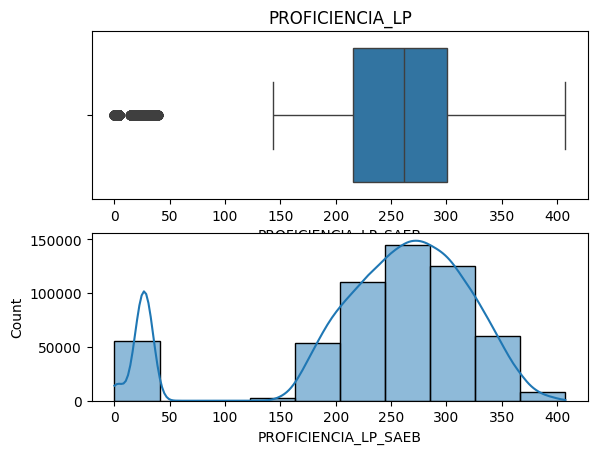

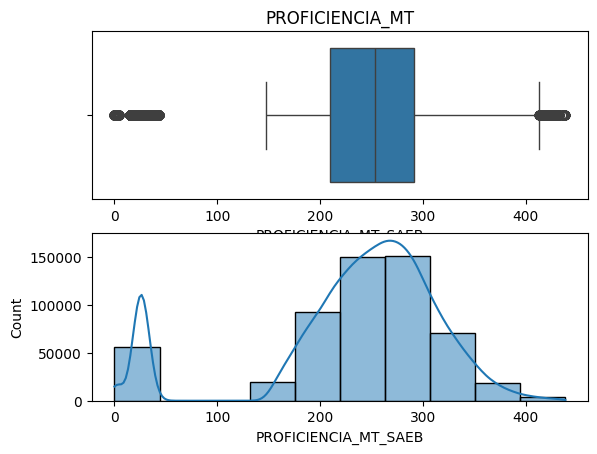

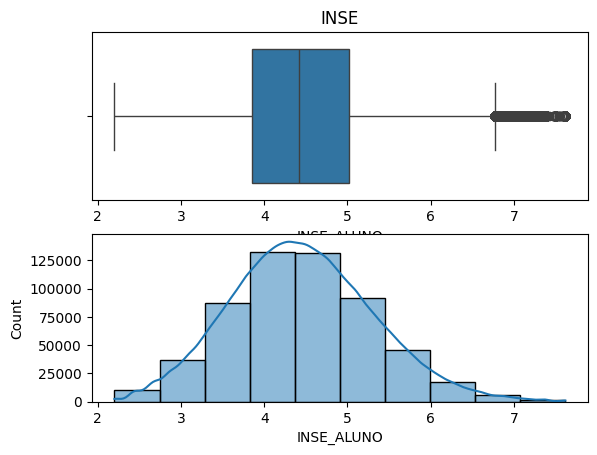

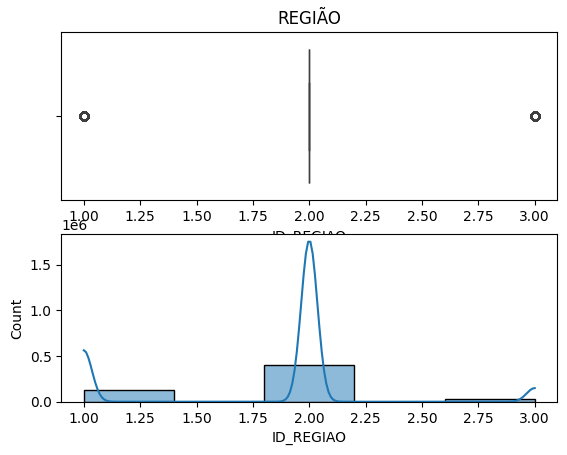

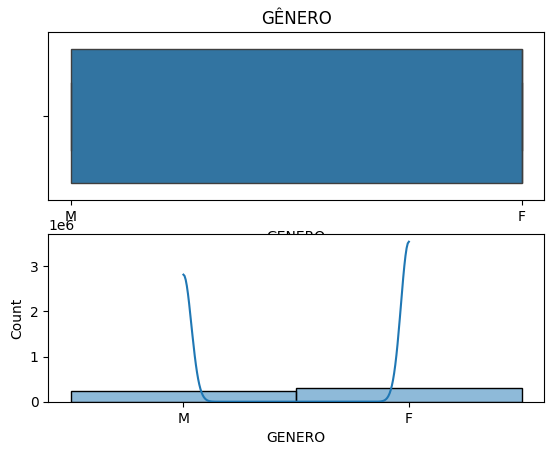

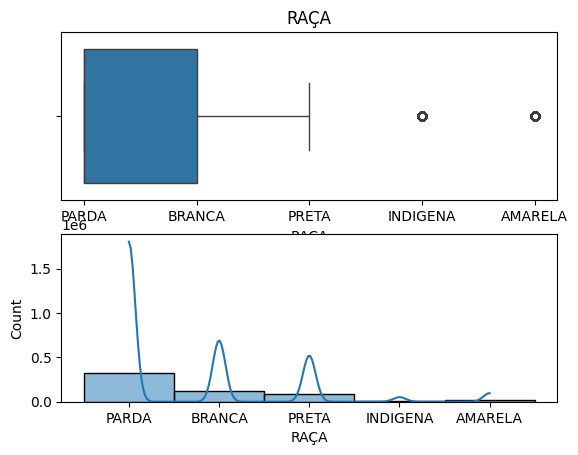

In [11]:
# Histograma e Boxplot dos principais dados para análise de distribuição

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(x="PROFICIENCIA_LP_SAEB", data=df, ax=ax1)
sns.histplot(x="PROFICIENCIA_LP_SAEB", data=df, bins=10, kde=True, ax=ax2)
ax1.title.set_text('PROFICIENCIA_LP')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(x="PROFICIENCIA_MT_SAEB", data=df, ax=ax1)
sns.histplot(x="PROFICIENCIA_MT_SAEB", data=df, bins=10, kde=True, ax=ax2)
ax1.title.set_text('PROFICIENCIA_MT')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(x="INSE_ALUNO", data=df, ax=ax1)
sns.histplot(x="INSE_ALUNO", data=df, bins=10, kde=True, ax=ax2)
ax1.title.set_text('INSE')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(x="ID_REGIAO", data=df, ax=ax1)
sns.histplot(x="ID_REGIAO", data=df, bins=5, kde=True, ax=ax2)
ax1.title.set_text('REGIÃO')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(x="GENERO", data=df, ax=ax1)
sns.histplot(x="GENERO", data=df, bins=2, kde=True, ax=ax2)
ax1.title.set_text('GÊNERO')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
sns.boxplot(x="RAÇA", data=df, ax=ax1)
sns.histplot(x="RAÇA", data=df, bins=5, kde=True, ax=ax2)
ax1.title.set_text('RAÇA')
plt.show()

# Gráficos e Resultados

A seguir, os gráficos de correlação GÊNERO x INSE e RAÇA x INSE apresentam uma forma muito poulida dos dados para conclusão visual simples na correlação entre as variáveis. Isso acontece devido a grande quantidade de dados que mesmo nas menores quantidades é suficiente para encher o gráfico de pontos.
Para resolver esse problema é usada função lmplot do Seaborn, que plota uma reta de regressão que apresenta a relação entre as variáveis.\
"Ela foi concebida como uma interface conveniente para ajustar modelos de regressão em subconjuntos condicionais de um conjunto de dados."

Assim podemos fazer uma avaliação consistente de relação entre as variáveis e chegar a conclusões sobre a tendência das notas das disciplinas em relação as condições socio econômicas e a comparação entre gêneros e raças.

# Gráfico com reta de regressão PROF PT x INSE e PROF MT x INSE
## Conclusão

### A inclinção positiva da reta de regressão mostra que a avaliação em Língua Portuguesa (Prof PT) e Matemática (PROF MT) aumenta com o crescimento do índice sócio econômico do aluno (INSE), confirmando a tendência de melhores notas para os alunos que possuim melhores condições sociais.

### Outra avaliação possível é a comparação entre as retas dos gêneros. O gênero masculino tem uma avaliação ligeiramente melhor que o gênero feminino.

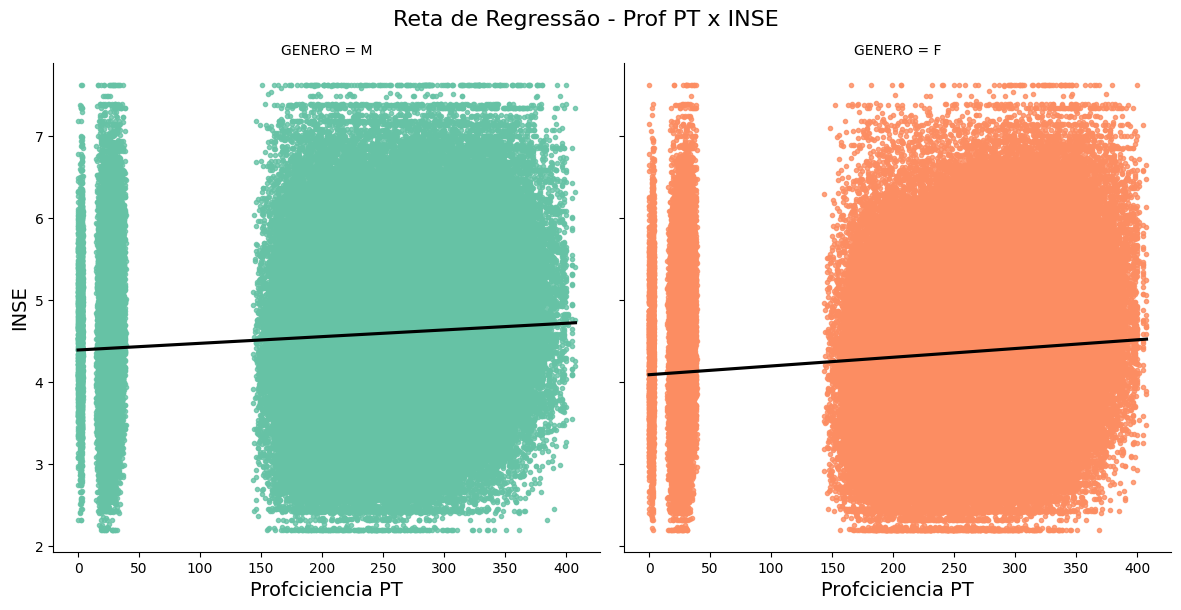

In [12]:
# Gráfico com reta de regressão INSE x PROF PT (GÊNERO)
ax = sns.lmplot(x='PROFICIENCIA_LP_SAEB', y="INSE_ALUNO", data=df, hue='GENERO',col='GENERO', markers=[".", "."],line_kws = {"color": "black"},palette="Set2")
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Prof PT x INSE ', fontsize=16, y=1.02)
ax.set_xlabels("Profciciencia PT", fontsize=14)
ax.set_ylabels("INSE", fontsize=14)
ax

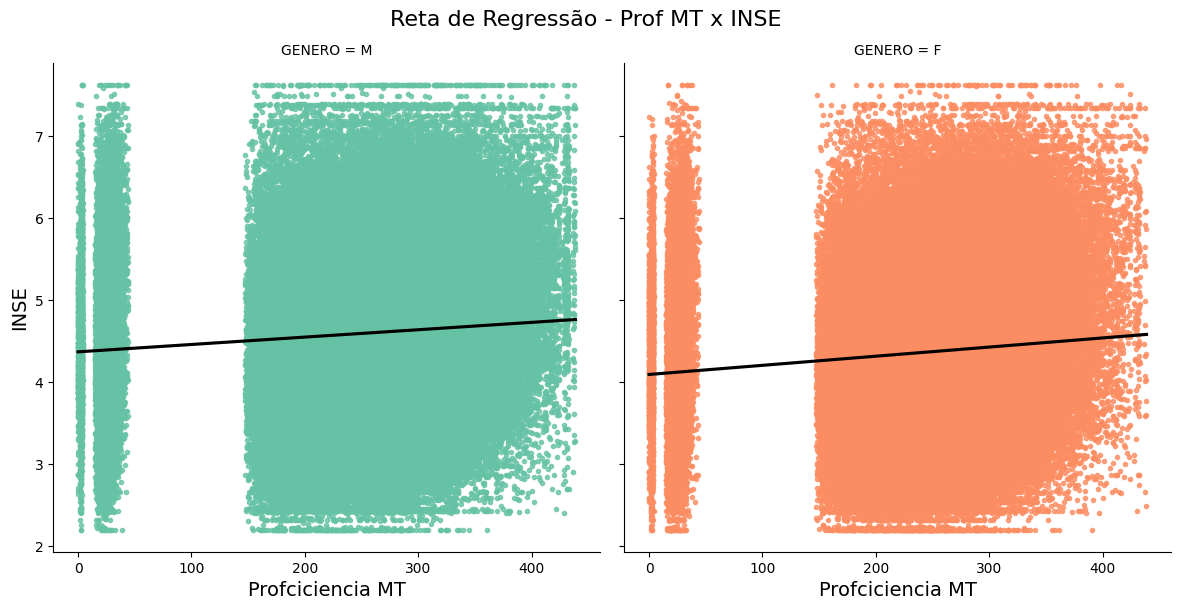

In [13]:
# Gráfico com reta de regressão INSE x PROF MT (GÊNERO)
ax = sns.lmplot(x='PROFICIENCIA_MT_SAEB', y="INSE_ALUNO", data=df, hue='GENERO',col='GENERO', markers=[".", "."],line_kws = {"color": "black"},palette="Set2")
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Prof MT x INSE ', fontsize=16, y=1.02)
ax.set_xlabels("Profciciencia MT", fontsize=14)
ax.set_ylabels("INSE", fontsize=14)
ax

# Gráfico com reta de regressão PROF PT x RAÇA
## Conclusão

### A inclinção positiva da reta de regressão mostra que a avaliação em todas as raças aumenta com o crescimento do índice sócio econômico do aluno (INSE), repetindo a mesma condição do gráfico anterior e mostrando que em qualquer raça ou gênero consdição sócio econônica e precedente.

### Outra avaliação nesse caso é entre as raças, apresentando a raça BRANCA com maior desempenho na avaliação seguida de PARDA, PRETA, AMARELA e INDIGENA.

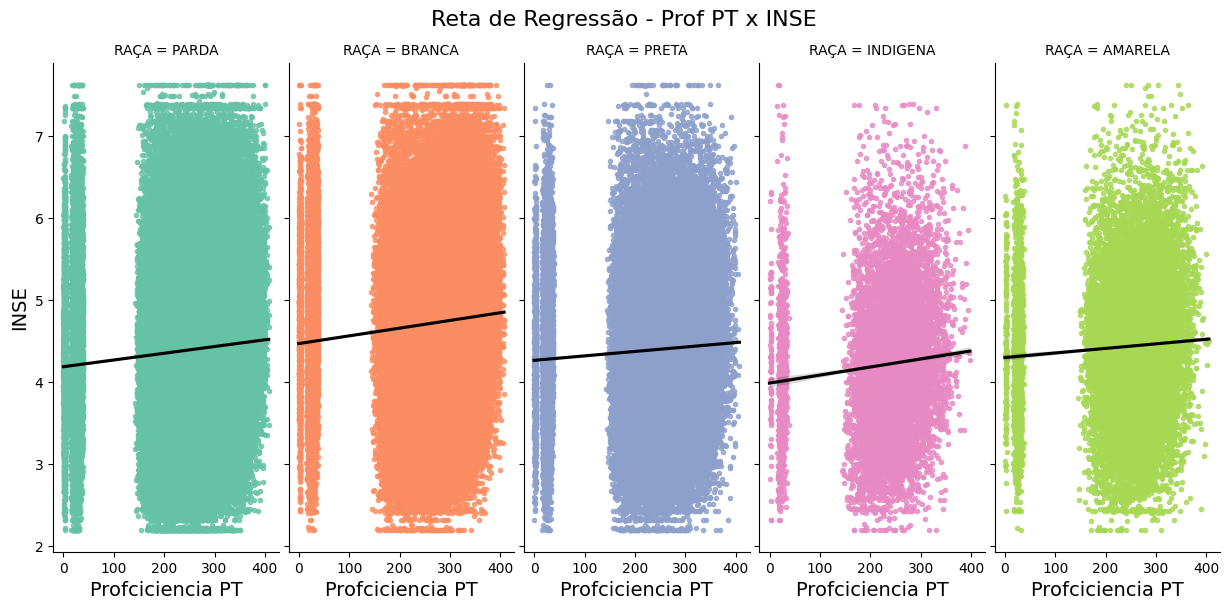

In [16]:
# Gráfico com reta de regressão INSE x PROF PT (RAÇA)
ax = sns.lmplot(x='PROFICIENCIA_LP_SAEB', y="INSE_ALUNO", data=df, hue='RAÇA',col='RAÇA',markers=[".", ".", ".", ".", "."],line_kws = {"color": "black"},palette="Set2")
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Prof PT x INSE ', fontsize=16, y=1.02)
ax.set_xlabels("Profciciencia PT", fontsize=14)
ax.set_ylabels("INSE", fontsize=14)
ax

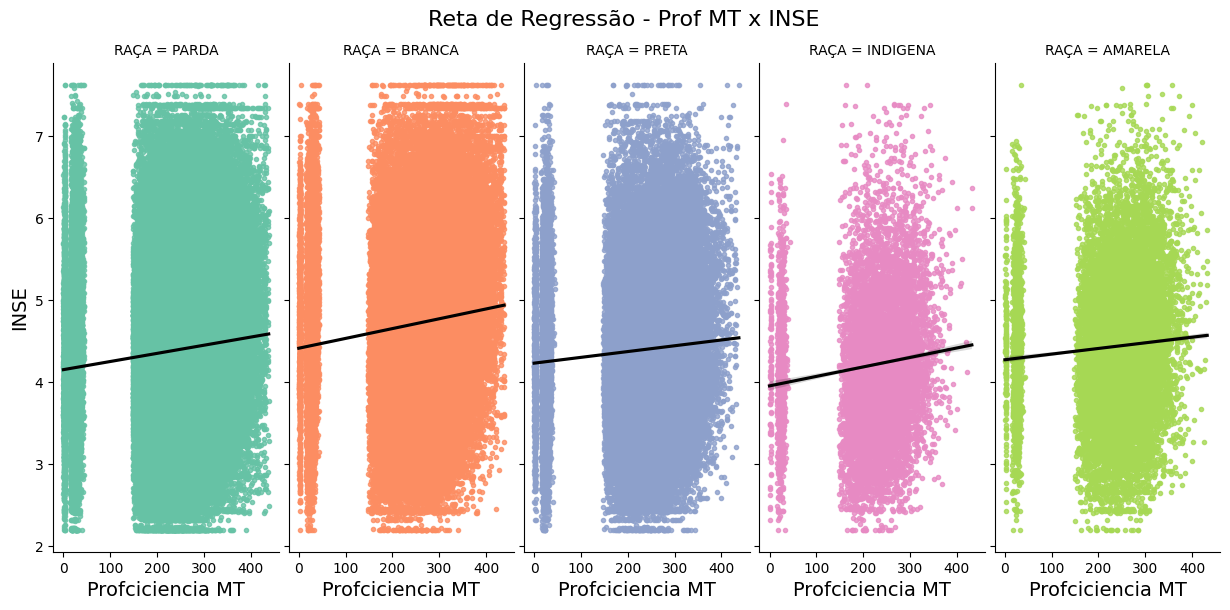

In [17]:
# Gráfico com reta de regressão INSE x PROF MT (RAÇA)
ax = sns.lmplot(x='PROFICIENCIA_MT_SAEB', y="INSE_ALUNO", data=df, hue='RAÇA',col='RAÇA',markers=[".", ".", ".", ".", "."],line_kws = {"color": "black"},palette="Set2")
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Prof MT x INSE ', fontsize=16, y=1.02)
ax.set_xlabels("Profciciencia MT", fontsize=14)
ax.set_ylabels("INSE", fontsize=14)
ax

# Conclusão Final

### O resultado final deve ser avaliado diante de uma condição histórica cultural e política de nosso país. As diferenças entre as raças não define uma qualificação da raça, mas com certeza, que as raças com menor classificação são aquelas que são mais afetadas pelas condições sócio econômicas de um país muito desigual. A mesma avaliação deve ser feita para o gênero, que nesse caso também mostra uma tendência para uma cultura feita para os homens.
### Independente de raça ou gênero a conclusão desse estudo é visível em relação a condição sócio econômica. Em todos os gráficos existem um grupo de alunos que se destacam com avalições baixíssimas. Creio que isso deve ser levado em consideração para uma política melhor de educação.
